### Import required packages

In [1]:
# import required packages
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced data visualization
import warnings  # to suppress unnecessary warnings

# Suppress warnings to enhance code readability
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
# reads 'car.data' as a pandas dataframe
df = pd.read_csv("../data/car.data")

# displays the top 5 rows of the dataframe
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
# rename the columns of the dataFrame for better readability
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "classes"]

# displays the top 5 rows of the dataframe
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Handling Missing Values

In [4]:
# counting null values in each column of the dataframe
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

### Summary Statistics

In [5]:
# gives summary stats for each field in the dataframe
df.describe().T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
classes,1727,4,unacc,1209


### Data Visualization

In [6]:
def categorical_viz(df: pd.DataFrame, column_name: str):
    """
    Visualize a categorical column in a DataFrame using countplot and a pie chart.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to visualize.

    Returns:
        None
    """

    # create a figure with two subplots (one for countplot and one for the pie chart)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # plot a countplot for the categorical column
    sns.countplot(data=df, x=column_name, ax=axes[0], palette="bright")

    # plot a pie chart to show the distribution of categories
    df[column_name].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[1])

    # adjust the layout of the plots for better visualization
    plt.tight_layout()

    # display the visualizations
    plt.show()


# get the list of column names from the DataFrame
columns = df.columns

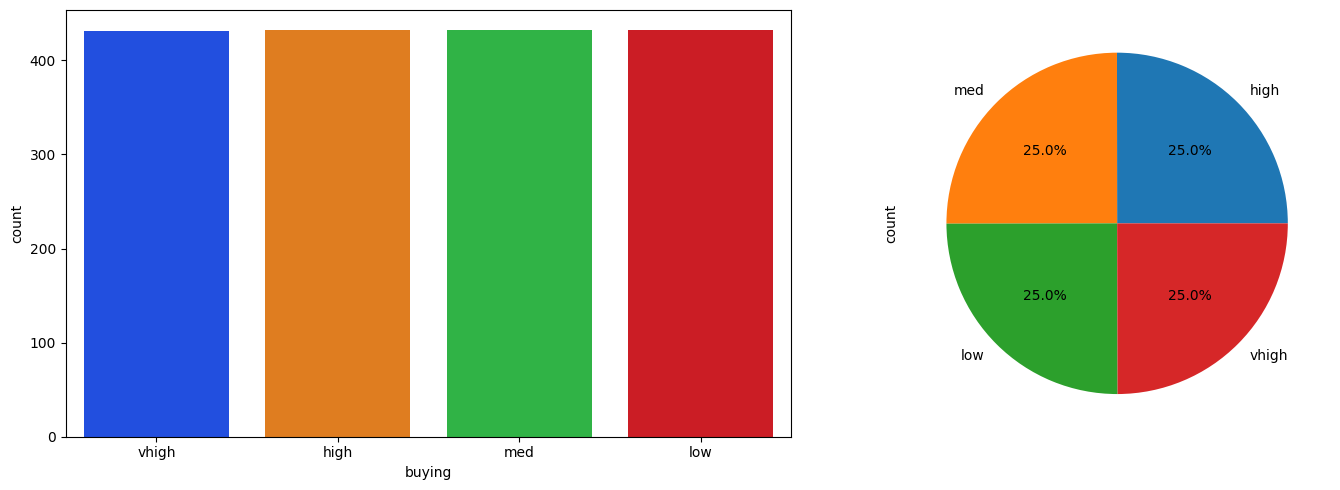

In [7]:
categorical_viz(df, columns[0])

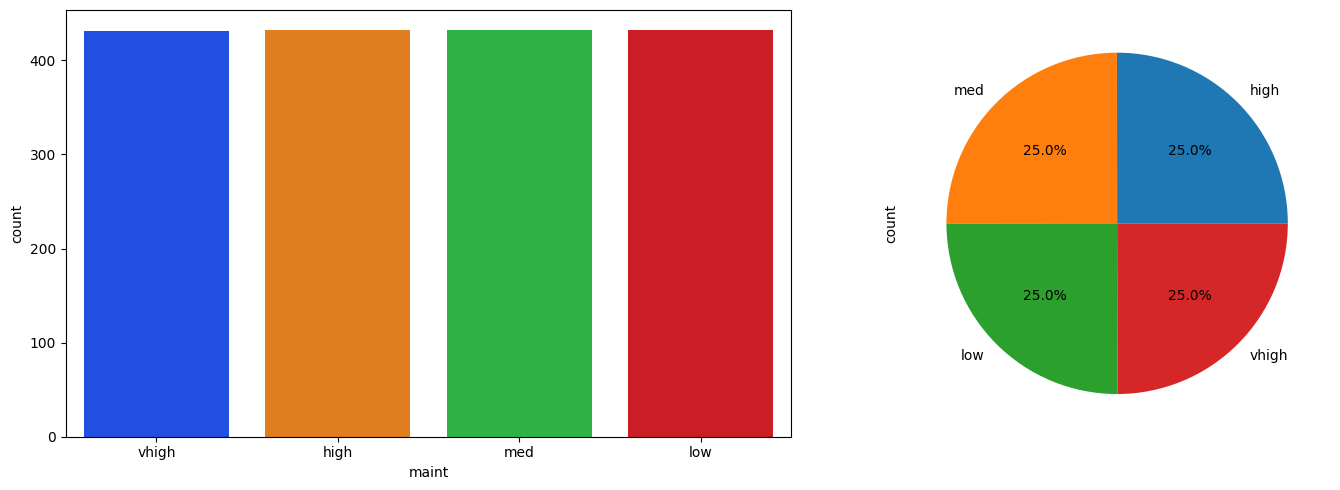

In [8]:
categorical_viz(df, columns[1])

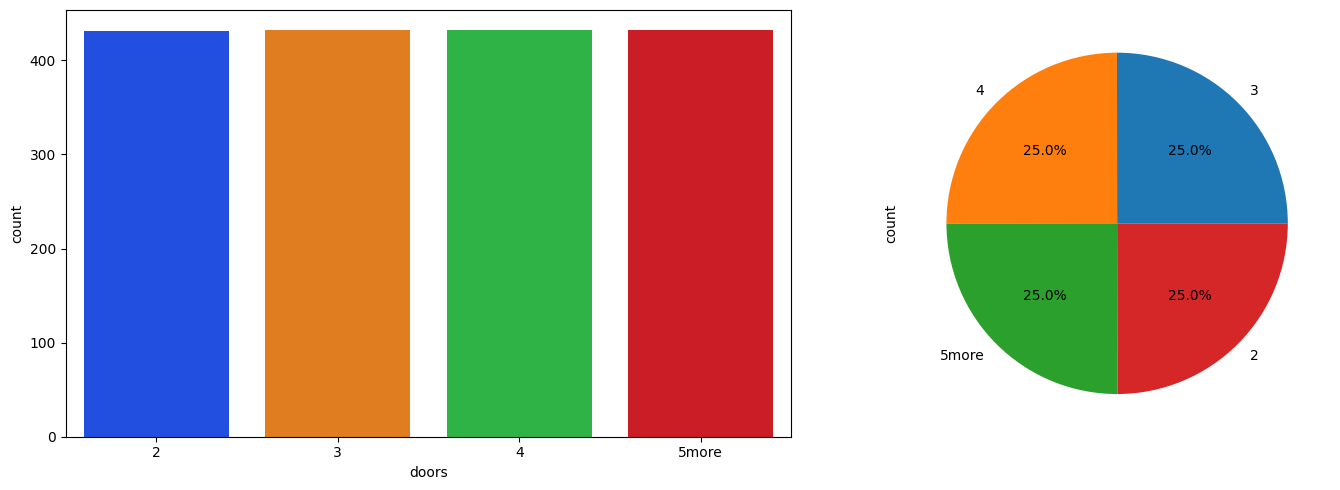

In [9]:
categorical_viz(df, columns[2])

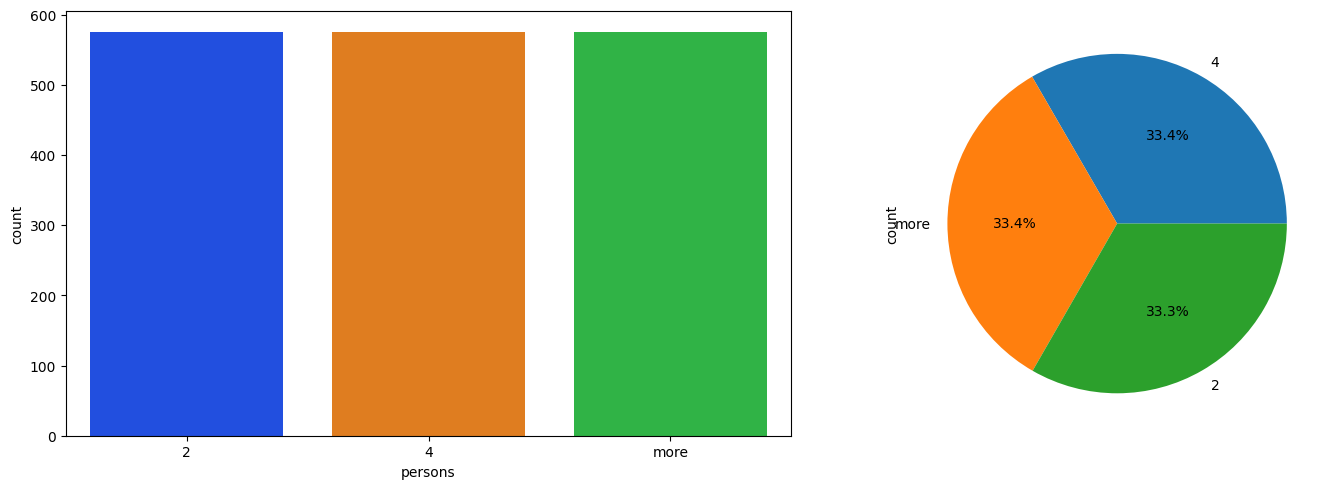

In [10]:
categorical_viz(df, columns[3])

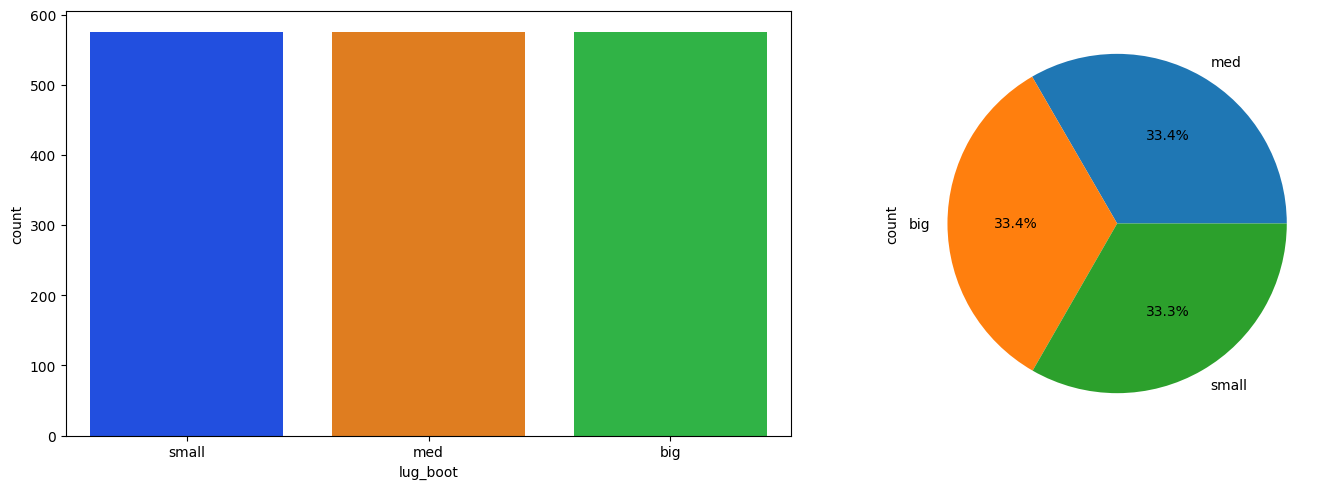

In [11]:
categorical_viz(df, columns[4])

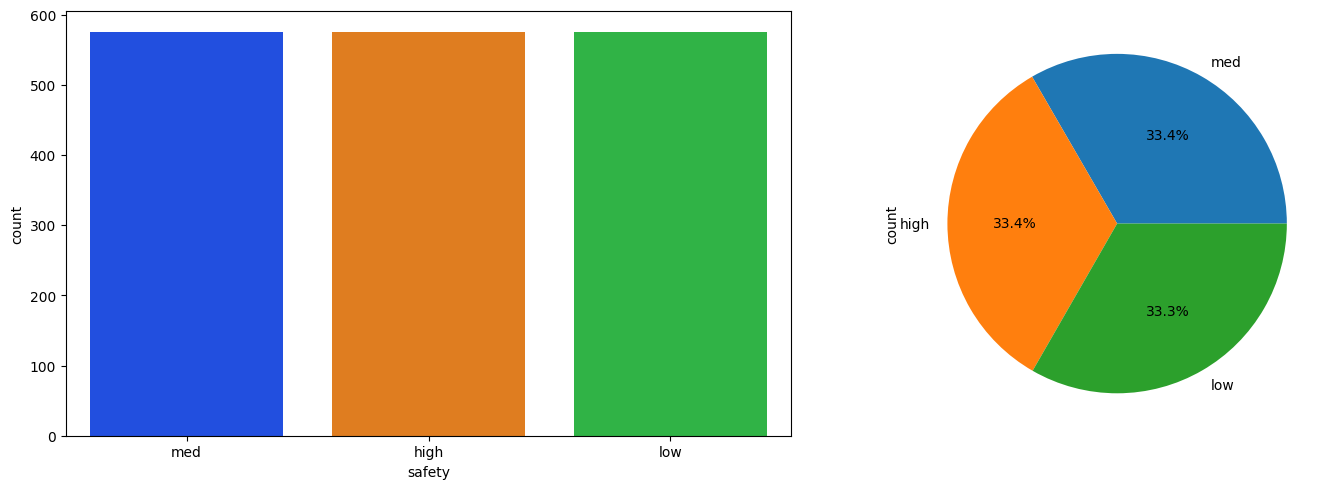

In [12]:
categorical_viz(df, columns[5])

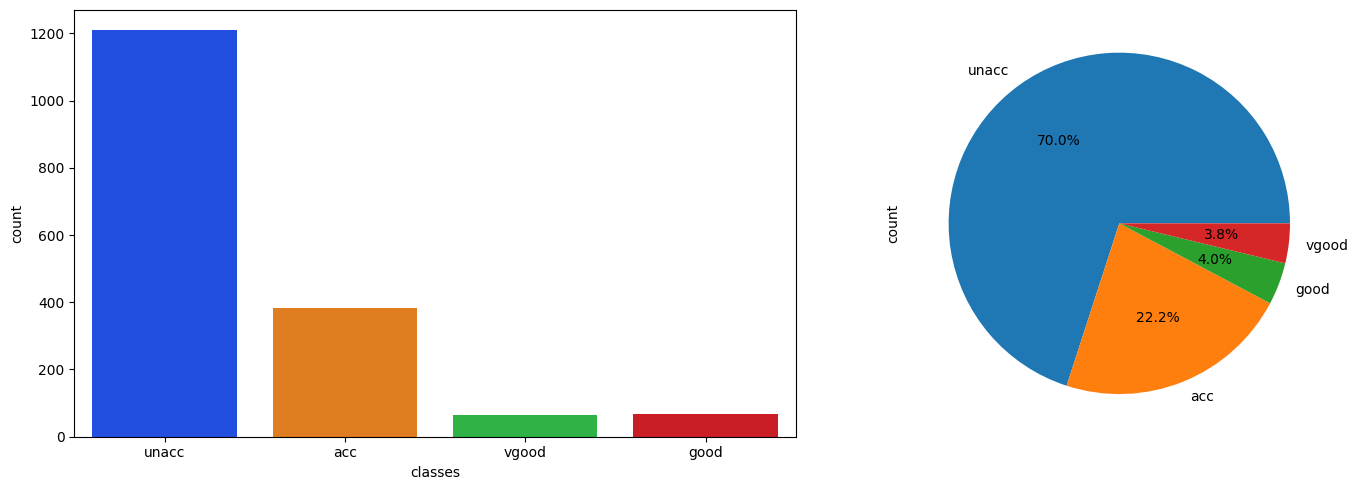

In [13]:
categorical_viz(df, columns[6])

### Data Encoding

In [14]:
# replace categorical values with numeric values
df["buying"].replace({"vhigh": 1, "high": 2, "med": 3, "low": 4}, inplace=True)
df["maint"].replace({"vhigh": 1, "high": 2, "med": 3, "low": 4}, inplace=True)
df["doors"].replace({"2": 1, "3": 2, "4": 3, "5more": 4}, inplace=True)
df["persons"].replace({"2": 1, "4": 2, "more": 3}, inplace=True)
df["lug_boot"].replace({"small": 1, "med": 2, "big": 3}, inplace=True)
df["safety"].replace({"low": 1, "med": 2, "high": 3}, inplace=True)
df["classes"].replace({"unacc": 1, "acc": 2, "good": 3, "vgood": 4}, inplace=True)

# displays the top 5 rows of the dataframe
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,1,1,1,1,1,2,1
1,1,1,1,1,1,3,1
2,1,1,1,1,2,1,1
3,1,1,1,1,2,2,1
4,1,1,1,1,2,3,1


### Data Splitting

In [15]:
X = df.drop(["classes"], axis=1)  # X contains all independant variables
y = df["classes"]  # Y contains only the dependant variable

In [16]:
X[:5]

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,2
1,1,1,1,1,1,3
2,1,1,1,1,2,1
3,1,1,1,1,2,2
4,1,1,1,1,2,3


In [17]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: classes, dtype: int64

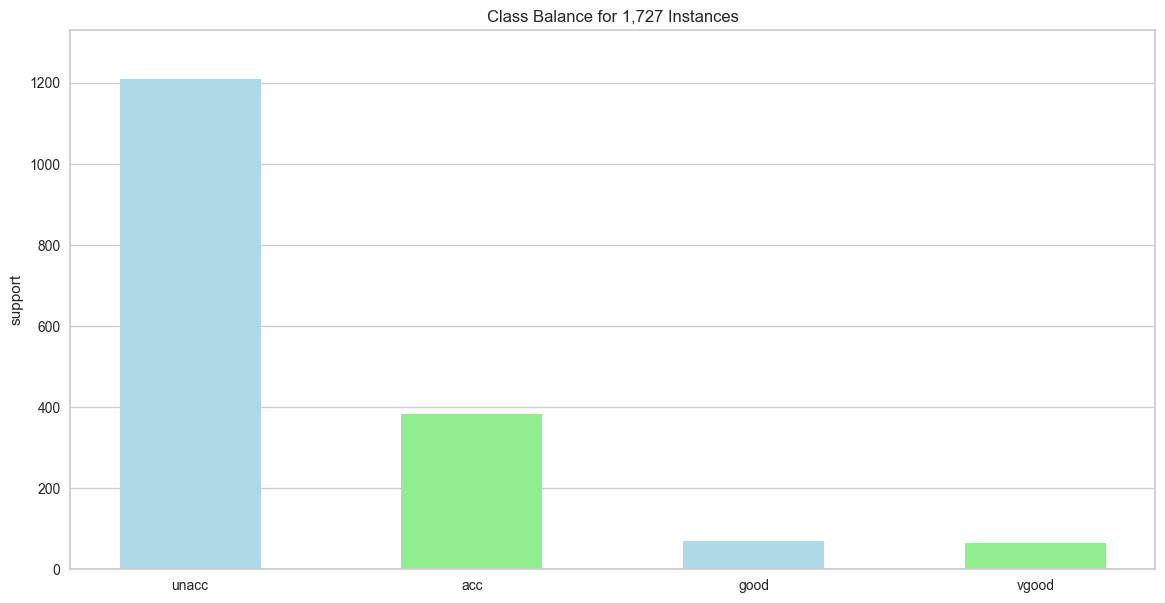

In [18]:
from yellowbrick.target import ClassBalance

classes = ["unacc", "acc", "good", "vgood"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

#### Sampling Imbalanced Data

In [19]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

smt = combine.SMOTETomek(
    random_state=14
)  # To make the dependant variable balanced using SMOTETomek method
X, y = smt.fit_resample(X, y)  # resampling the dataset

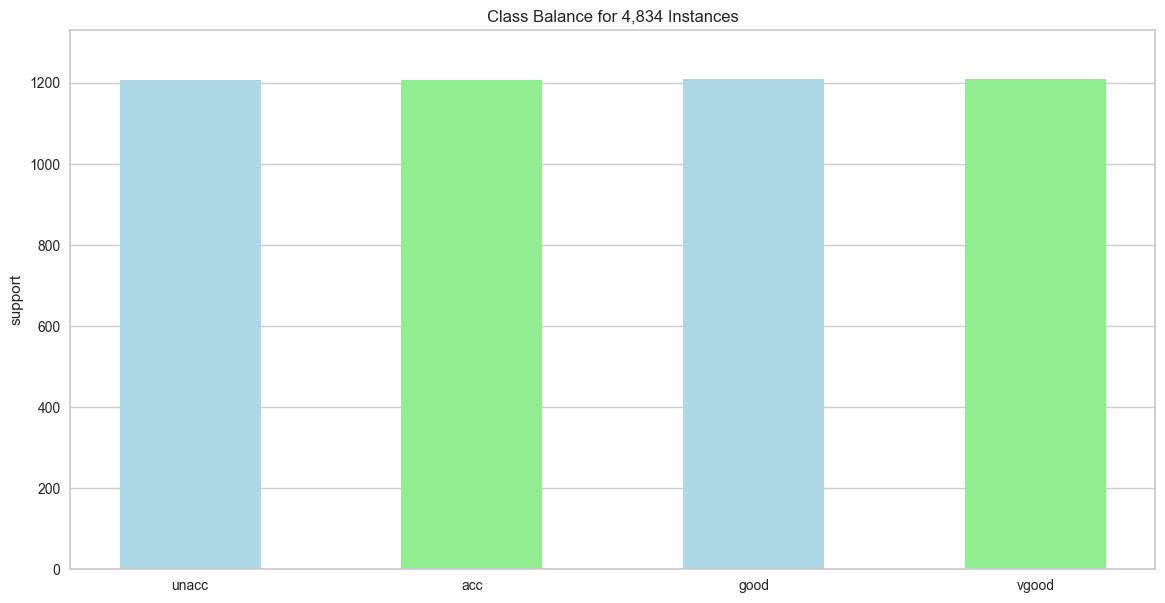

In [20]:
# Class balance between dependant variable is much more balanced now..
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

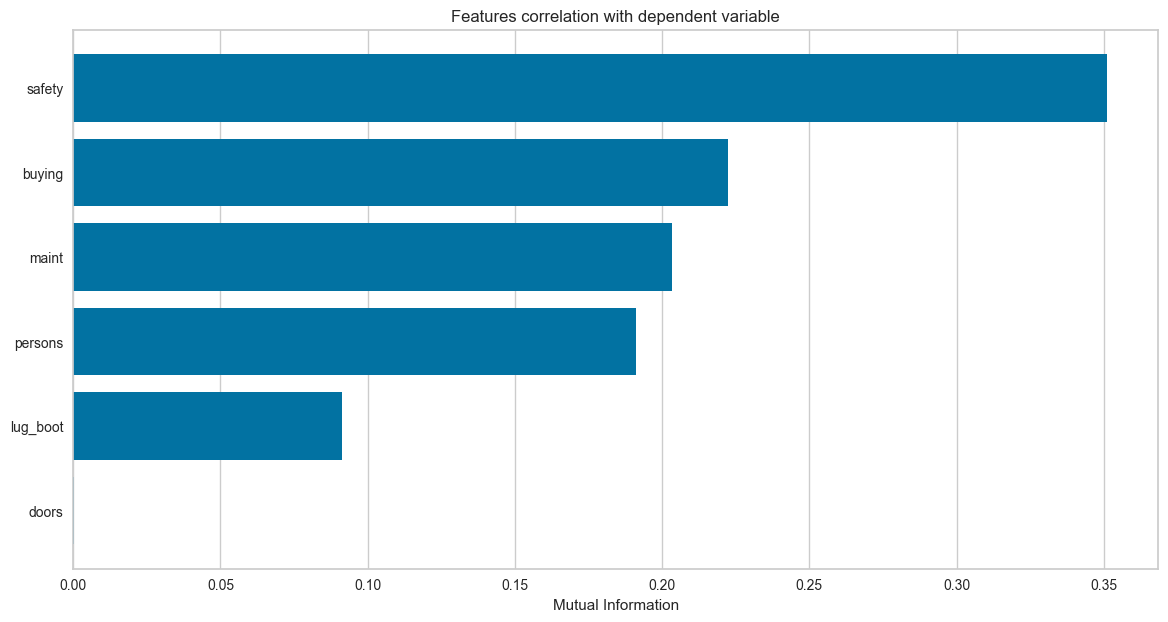

In [21]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="mutual_info-classification", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

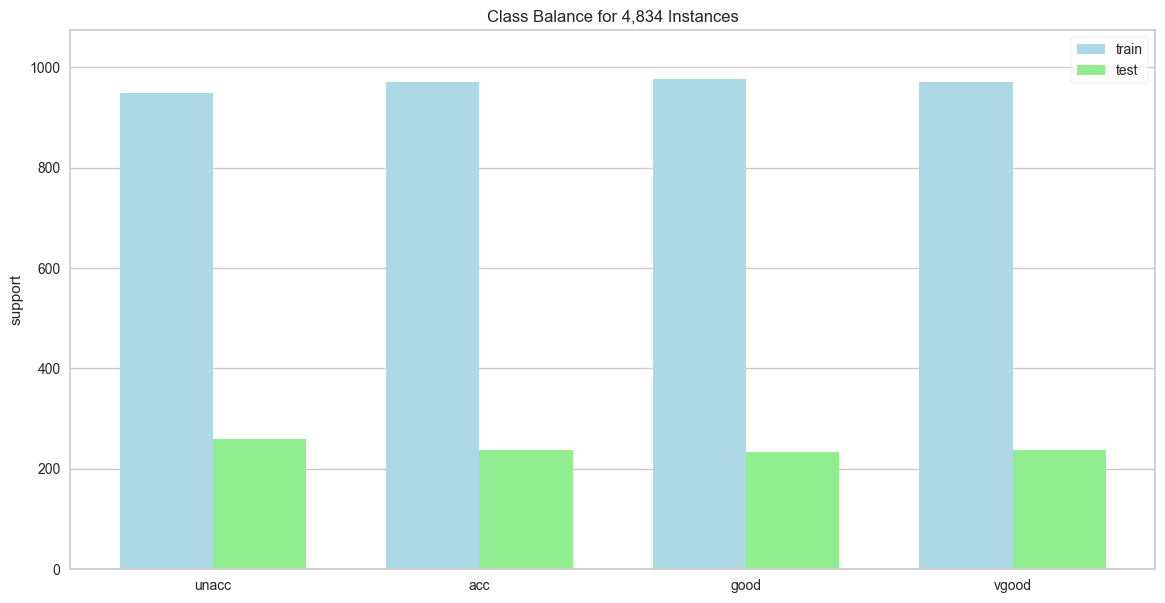

In [23]:
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y_train, y_test)
viz.show()
plt.show()

### Model Building

In [24]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [25]:
# Initialize lists to store K values and corresponding accuracies
k_values = []
accuracies = []

# Try different K values
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracies.append(accuracy)
optimal_k = np.argmax(accuracies) + 1
print(f"Optimal K value : {optimal_k}")

Optimal K value : 6


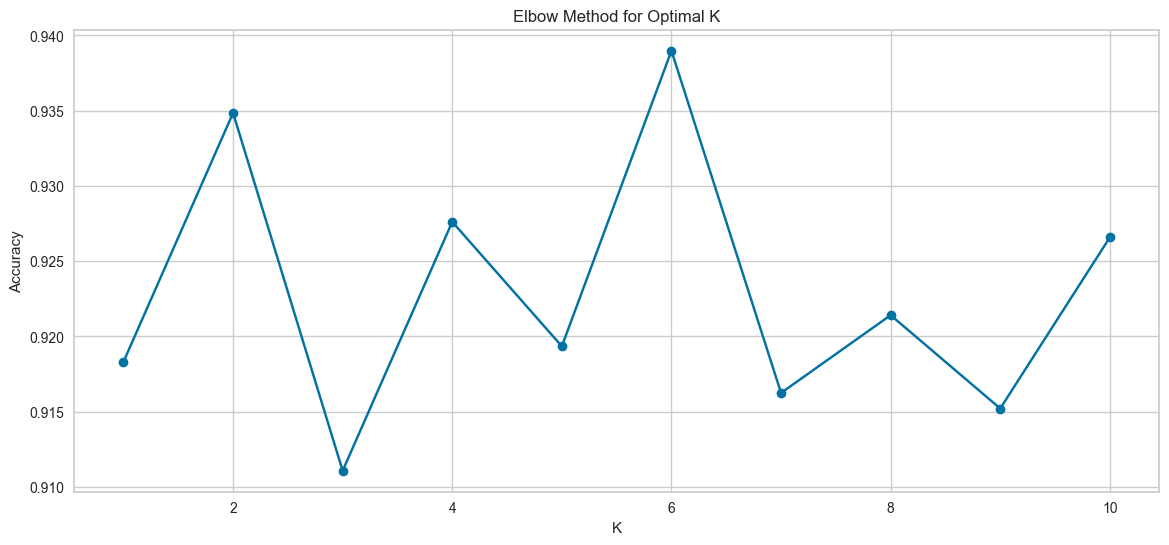

In [26]:
# Plot the elbow curve
plt.figure(figsize=(14, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal K')
plt.show()

#### K Nearest Neighbors

In [27]:
knn_clf = KNeighborsClassifier(n_neighbors=optimal_k)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [28]:
y_pred = knn_clf.predict(X_test)

**Classification Accuracy:**

In [29]:
accuracies = {'Regular KNN' : accuracy_score(y_test, y_pred)}
print(accuracy_score(y_test, y_pred))

0.9389865563598759


**Classification Error:**

In [30]:
print(1 - accuracy_score(y_test, y_pred))

0.061013443640124065


**Class Prediction Error**

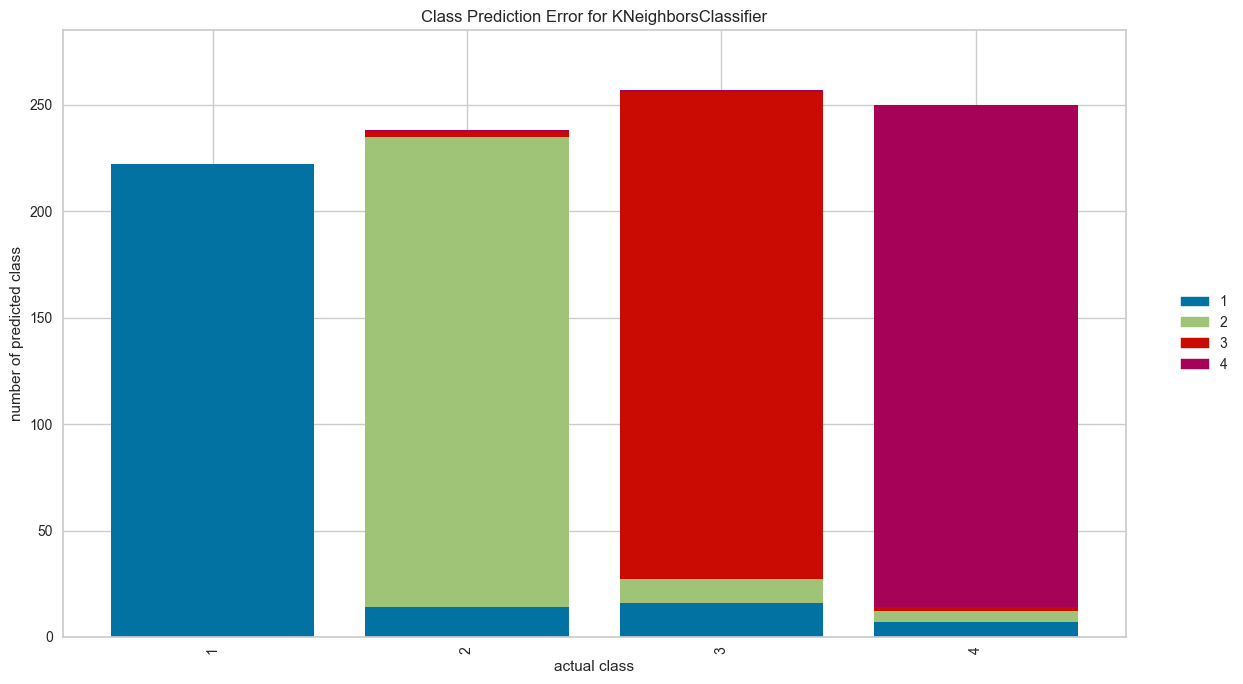

In [31]:
from yellowbrick.classifier import class_prediction_error

plt.figure(figsize=(14, 7))
visualizer = class_prediction_error(knn_clf, X_train, y_train, X_test, y_test)
visualizer.show()
plt.show()

**Confusion Matrix**

In [32]:
confusion_matrix(y_test, y_pred)

array([[222,  14,  16,   7],
       [  0, 221,  11,   5],
       [  0,   2, 229,   2],
       [  0,   1,   1, 236]], dtype=int64)

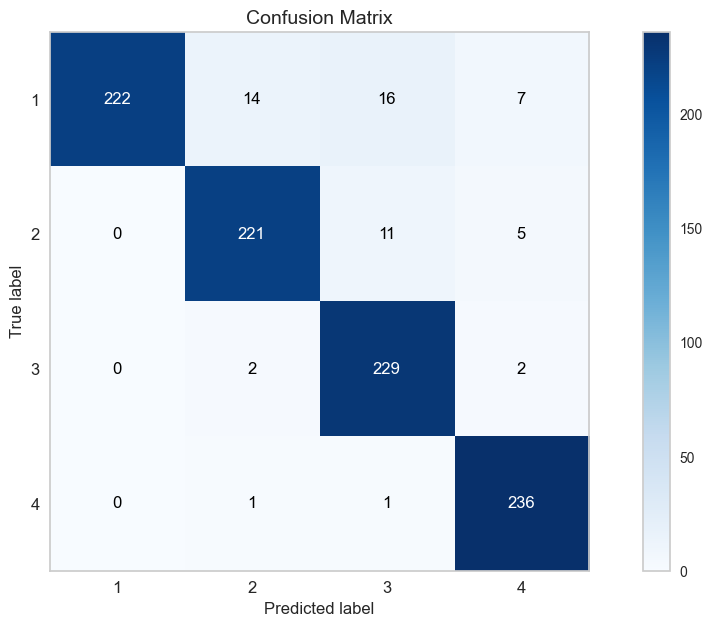

In [33]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92       259
           2       0.93      0.93      0.93       237
           3       0.89      0.98      0.93       233
           4       0.94      0.99      0.97       238

    accuracy                           0.94       967
   macro avg       0.94      0.94      0.94       967
weighted avg       0.94      0.94      0.94       967



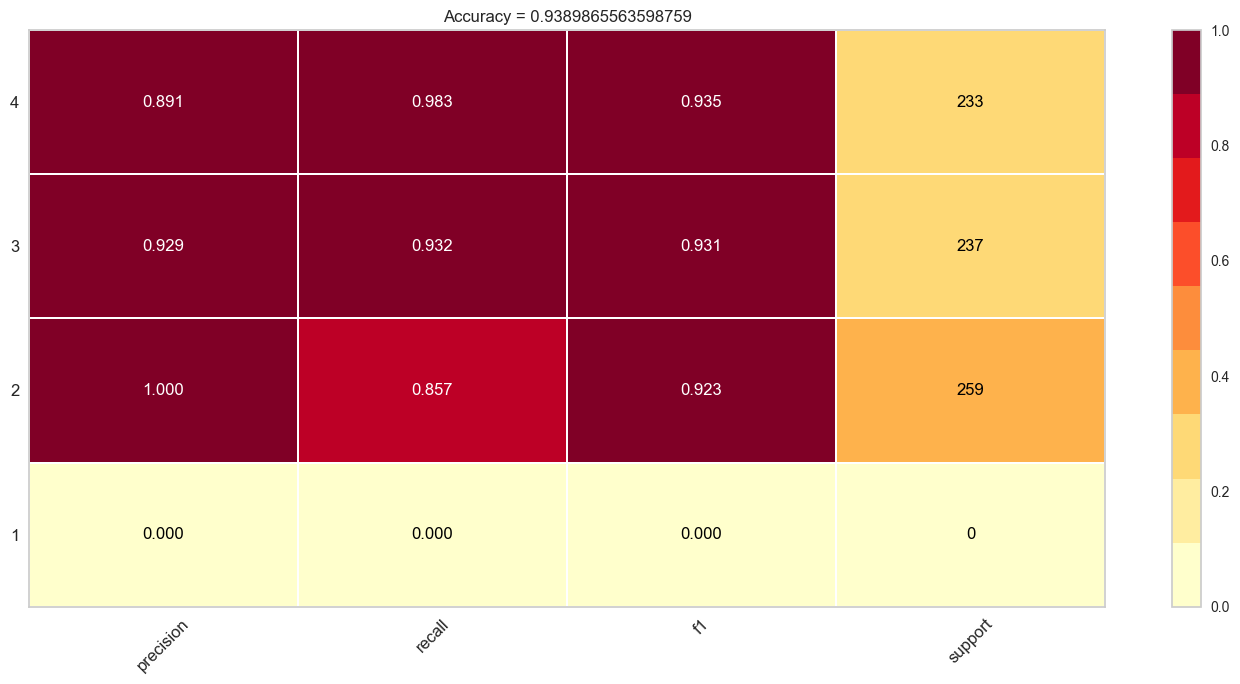

In [35]:
import yellowbrick as yb

plt.figure(figsize=(14, 7))
visualizer =  yb.classifier.classification_report(
    knn_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    support=True,
    title=f"Accuracy = {accuracy_score(y_test, y_pred)}",
)
plt.show()

#### Weighted KNN

In [36]:
weighted_clf = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')
weighted_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [37]:
y_pred = weighted_clf.predict(X_test)

**Classification Accuracy:**

In [38]:
accuracies['Weighted KNN'] = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.9400206825232679


**Classification Error:**

In [39]:
print(1 - accuracy_score(y_test, y_pred))

0.05997931747673213


**Class Prediction Error**

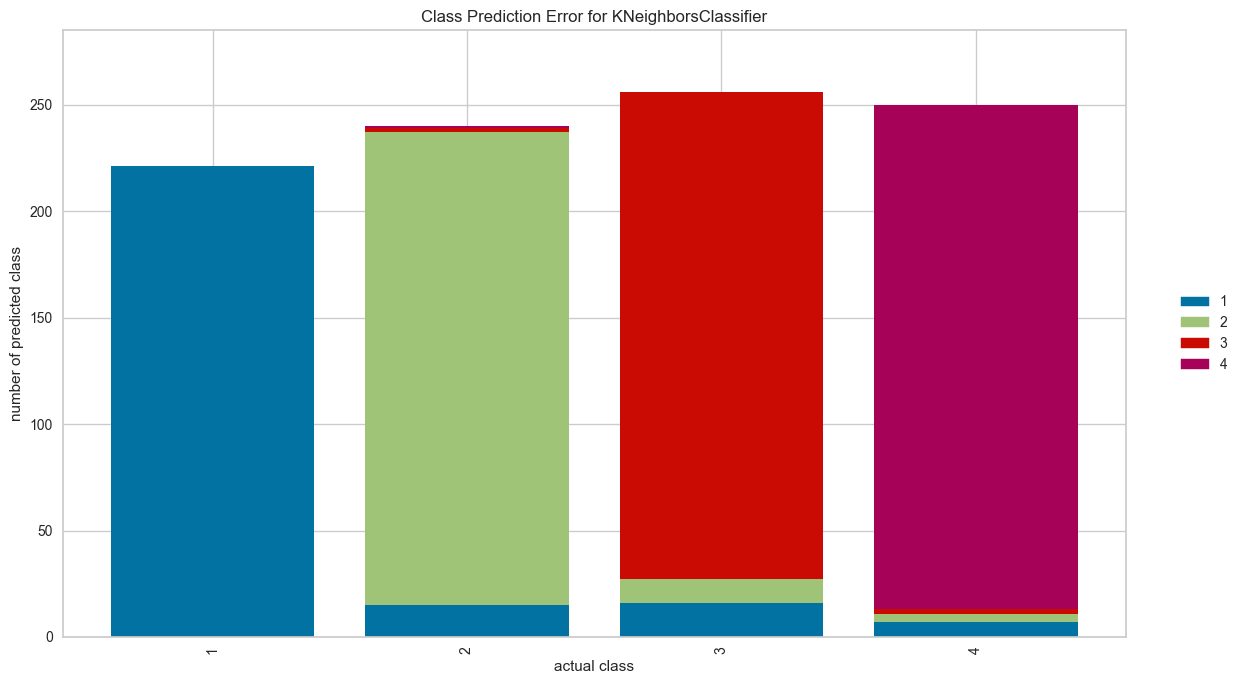

In [40]:
plt.figure(figsize=(14, 7))
visualizer = class_prediction_error(weighted_clf, X_train, y_train, X_test, y_test)
visualizer.show()
plt.show()

**Confusion Matrix**

In [41]:
confusion_matrix(y_test, y_pred)

array([[221,  15,  16,   7],
       [  0, 222,  11,   4],
       [  0,   2, 229,   2],
       [  0,   1,   0, 237]], dtype=int64)

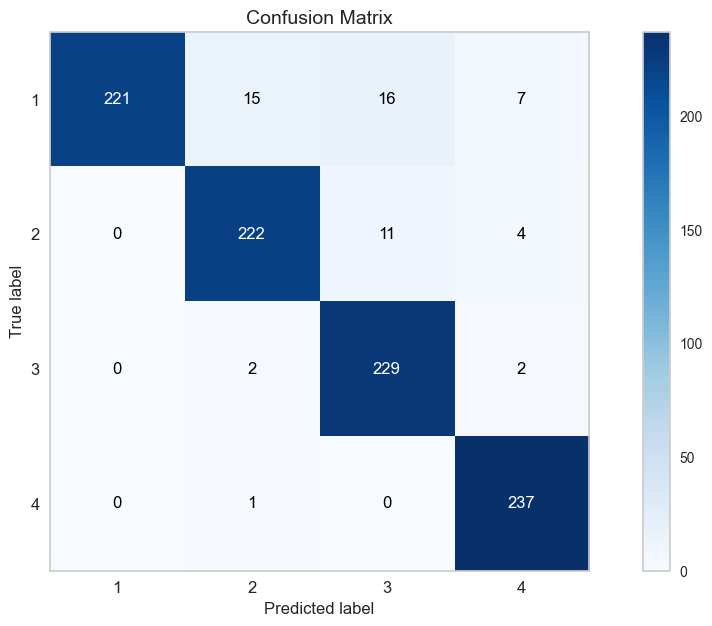

In [42]:
plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92       259
           2       0.93      0.94      0.93       237
           3       0.89      0.98      0.94       233
           4       0.95      1.00      0.97       238

    accuracy                           0.94       967
   macro avg       0.94      0.94      0.94       967
weighted avg       0.94      0.94      0.94       967



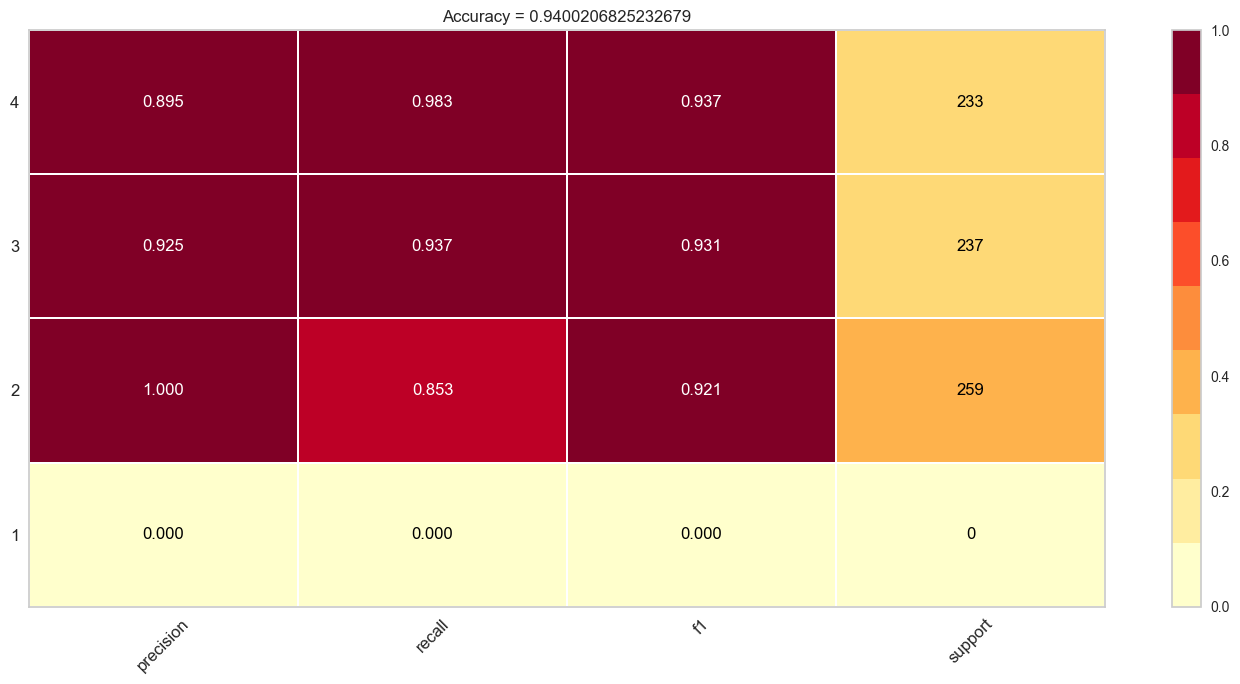

In [44]:
plt.figure(figsize=(14, 7))
visualizer =  yb.classifier.classification_report(
    weighted_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    support=True,
    title=f"Accuracy = {accuracy_score(y_test, y_pred)}",
)
plt.show()

#### Nearest Centroid

In [45]:
near_clf = NearestCentroid()
near_clf.fit(X_train, y_train)

NearestCentroid()

In [46]:
y_pred = near_clf.predict(X_test)

**Classification Accuracy:**

In [47]:
accuracies['Nearest Centroid'] = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.7321613236814891


**Classification Error:**

In [48]:
print(1 - accuracy_score(y_test, y_pred))

0.2678386763185109


**Class Prediction Error**

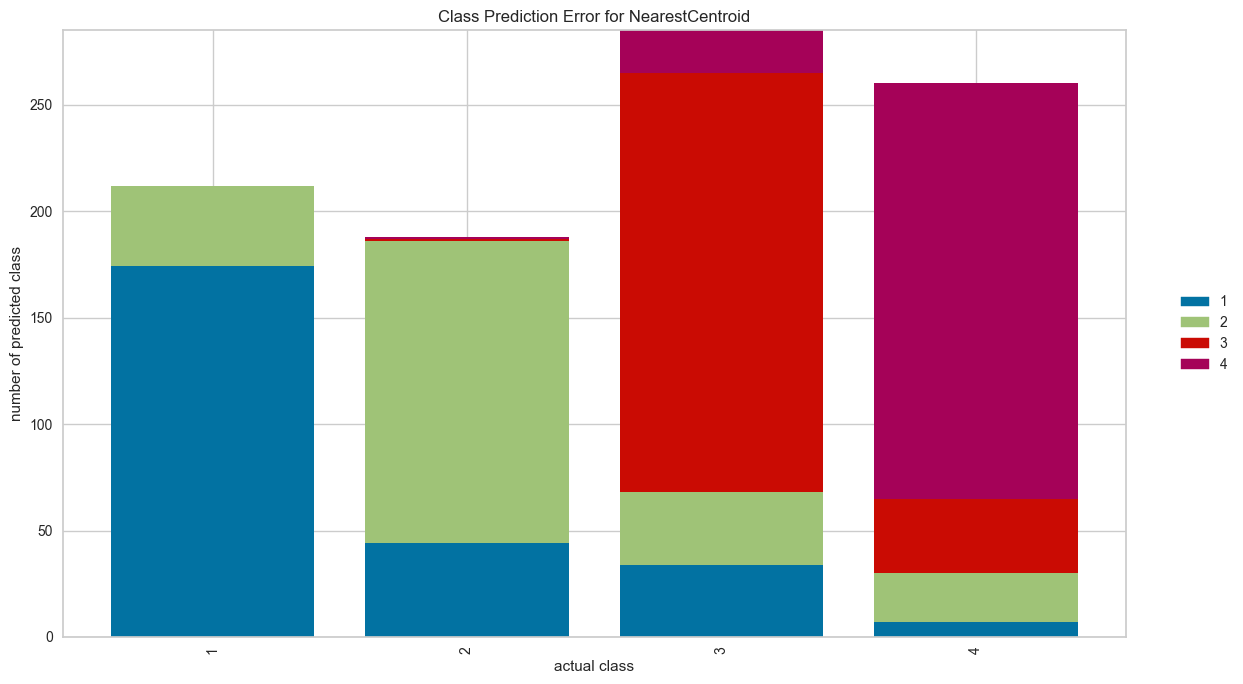

In [49]:
plt.figure(figsize=(14, 7))
visualizer = class_prediction_error(near_clf, X_train, y_train, X_test, y_test)
visualizer.show()
plt.show()

**Confusion Matrix**

In [50]:
confusion_matrix(y_test, y_pred)

array([[174,  44,  34,   7],
       [ 38, 142,  34,  23],
       [  0,   1, 197,  35],
       [  0,   1,  42, 195]], dtype=int64)

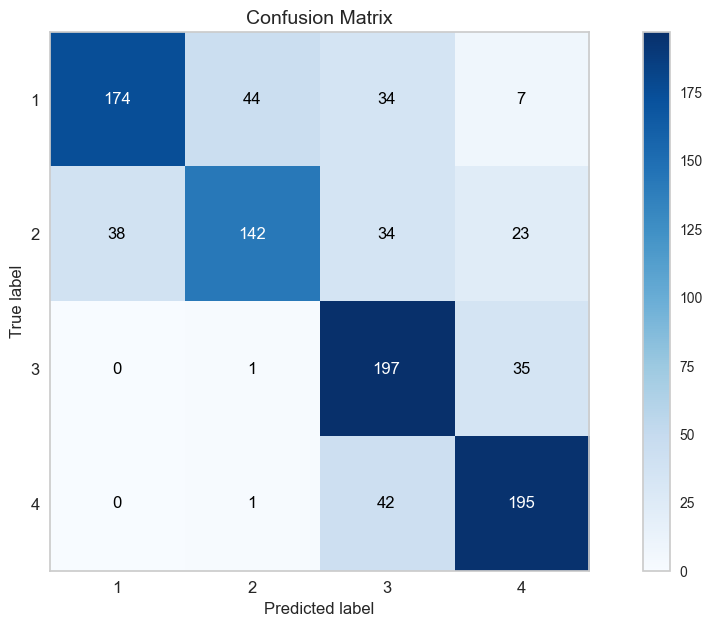

In [51]:
plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.67      0.74       259
           2       0.76      0.60      0.67       237
           3       0.64      0.85      0.73       233
           4       0.75      0.82      0.78       238

    accuracy                           0.73       967
   macro avg       0.74      0.73      0.73       967
weighted avg       0.74      0.73      0.73       967



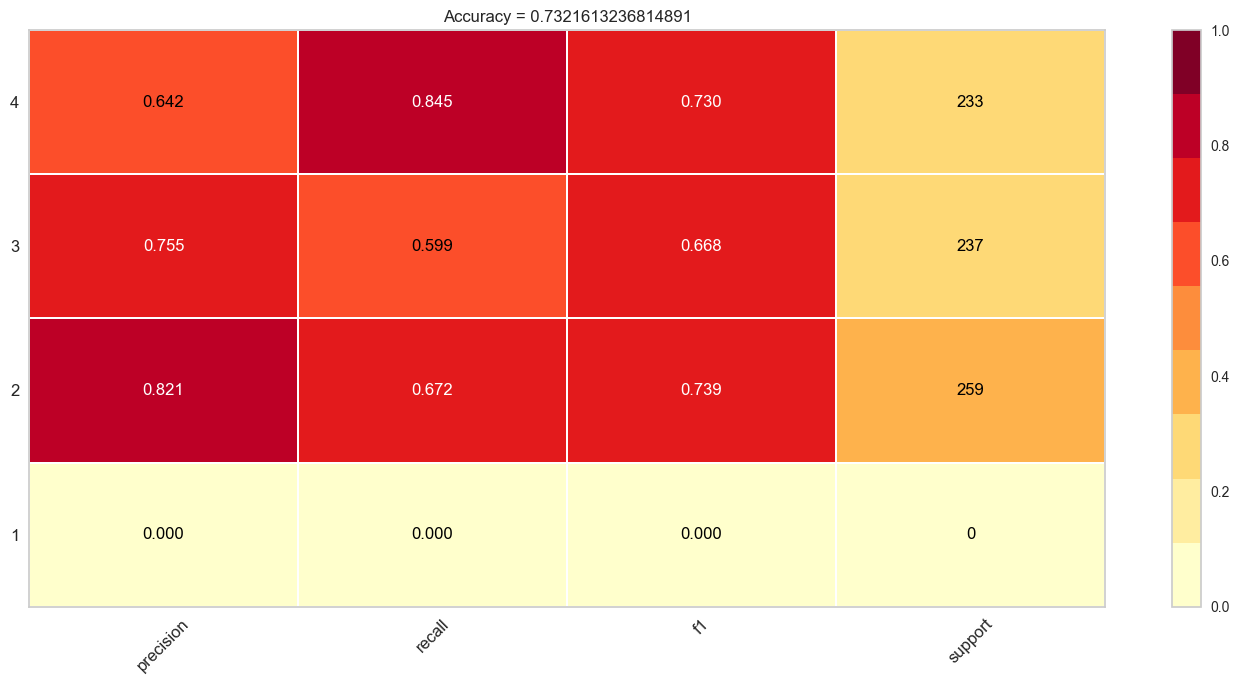

In [53]:
plt.figure(figsize=(14, 7))
visualizer = yb.classifier.classification_report(
    near_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    support=True,
    title=f"Accuracy = {accuracy_score(y_test, y_pred)}",
)
plt.show()

### Compare the Models

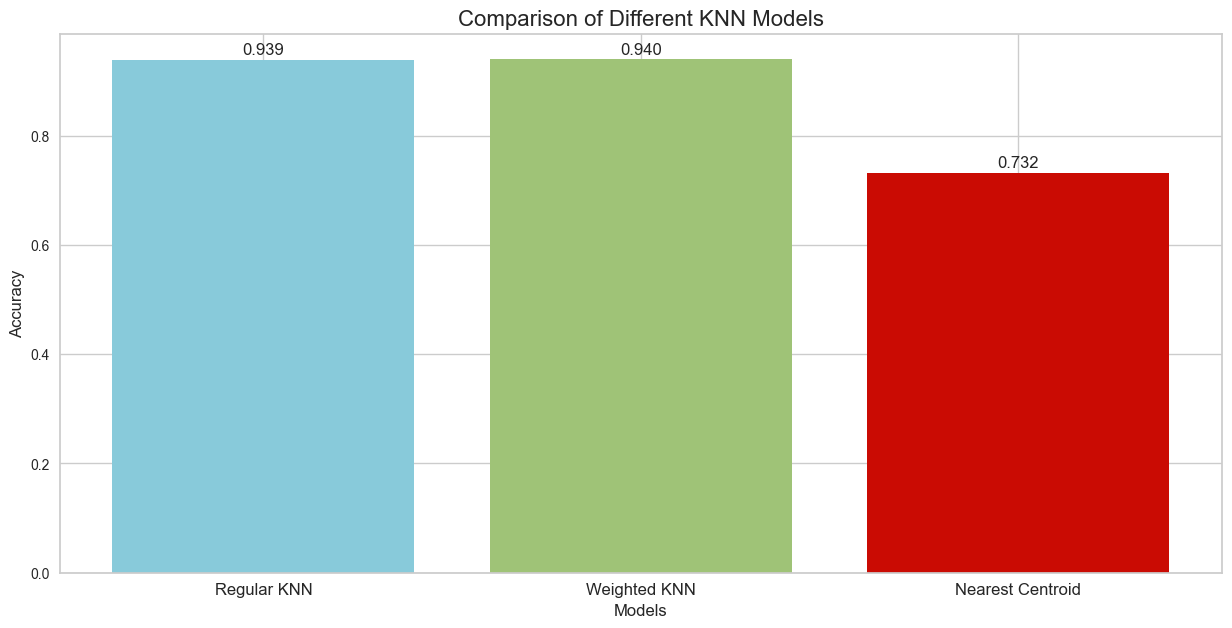

In [54]:
# Create a figure with a larger size
plt.figure(figsize=(15, 7))

# Create bars with colors and labels
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['c', 'g', 'r'])

# Add labels and title
plt.title("Comparison of Different KNN Models", fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)

# Add text labels on top of the bars
for bar, accuracy in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.3f}', ha='center', fontsize=12)

# Set x-axis labels (model names)
plt.xticks(list(accuracies.keys()), fontsize=12)

# Display the plot
plt.show()